1. Develop a user-friendly computer program for Gauss quadrature. Test it by
using the following function:

$$\int_0^1 x^{0.1}(1.2 - x)(1 - e^{20(x-1)}) \,dx$$

>If necessary, the true value is 0.602298.

The integration by Gauss Quadrature:  0.602298396396365
The true error:  6.58139932316688e-05


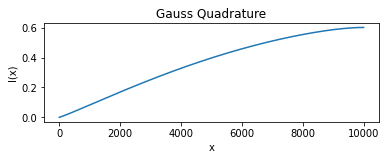

In [1]:
#Truong Tri Dung - ITCSIU21126
import math
import numpy as np
import matplotlib.pyplot as p

def x(xd,a,b):
    a0=(b+a)/2
    a1=(b-a)/2
    return a0+a1*xd

def f(x,a,b):
    a1=(b-a)/2
    return pow(x,0.1)*(1.2-x)*(1-pow(np.e,20*(x-1)))*a1
    #return (0.2+25*x-200*pow(x,2)+675*pow(x,3)-900*pow(x,4)+400*pow(x,5))*a1

l = []
def GaussQuadra(n):
    i=0
    h=(1-0)/n
    I=0
    while (i<1):
        l.append(I)
        I=I+f(x(-0.5773502692,i,i+h),i,i+h)+f(x(0.5773502692,i,i+h),i,i+h)
        i+=h
    return I

I_true=0.602298
I_estimated=GaussQuadra(10000)
print("The integration by Gauss Quadrature: ",I_estimated)
print("The true error: ",abs(I_true-I_estimated)/I_true*100)
fig = p.figure()
ax1 = fig.add_subplot(211)
ax1.plot(l)
ax1.set_xlabel('x')
ax1.set_ylabel('I(x)')
ax1.title.set_text("Gauss Quadrature")
p.show()

2. Develop a user-friendly program to apply a Romberg algorithm to estimate
the derivative of a given function. Test it by using the following function:

$$f(x) = 5e^{-2x}x$$

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 5*math.exp(-2*x)*x

def derivative_f(x):
    return 5 * np.exp(-2*x) - 10 * x * np.exp(-2*x)
def Romberg_Integration(f,x):
    h = 1
    d1 = (f(x + h) - f(x)) / h 
    while True:
        h/=2
        d2 = d1
        d1 = (f(x + h) - f(x)) / h 
        if abs(d1 - d2) < np.exp(-6):
            return d1

def Graph(f, array):
    a = []
    for i in range(len(array)):
        t = Romberg_Integration(f,array[i])
        a.append(t)
    print("The derivative of f(x) at ",array[-1]," is: ", a[-1])
    print("The true error is: ", abs(derivative_f(array[-1] - a[-1])))
    return a 


x = np.linspace(0,3,100)
a = Graph(f,x)
plt.plot(x, a)
plt.xlabel('x')
plt.ylabel('R(x)')
plt.title('Romberg Integration')
plt.show()

: 